In [88]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
DEFAULT_CLASSIFICATION_THRESHOLD = 0.5



In [89]:
def print_training_testing_meta(X_train,X_test,y_train,y_test):
    """Takes in a training and testing data (with both target and feature variables)
    and prints their metadata.
    """
    print(f"Shape of Training set : {X_train.shape}")
    print(f"Shape of test set : {X_test.shape}")
    print(f"Percentage of classes in training set:{y_train.value_counts(normalize=True)}")
    print(f"Percentage of classes in test set:{y_test.value_counts(normalize=True)}")


def print_model_performance_for_classification(model, 
                                               features, 
                                               target, 
                                               threshold=DEFAULT_CLASSIFICATION_THRESHOLD):
    """
    Print the relevant scores for a classification model

    model: the model to classify with
    features: the feature vectors
    target: our target variable to predict
    threshold: threshold to infer as belonging to lable 1.
    """
    # predicting using the independent variables
    prediction = model.predict_proba(features)[:, 1]
    prediction_threshold = prediction > threshold
    final_prediction = np.round(prediction_threshold)
    # get the scores
    accuracy = accuracy_score(target, final_prediction)  
    recall = recall_score(target, final_prediction)  
    precision = precision_score(target, final_prediction)  
    f1 = f1_score(target, final_prediction)  
    
    print(f"Accuracy:{accuracy}")
    print(f"Recall:{recall}")
    print(f"Precision: {precision}")
    print(f"F1 score: {f1}")

In [64]:
url = "Cars-dataset.csv"
car_report = pd.read_csv(url)

car_report.head(10) 

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
0,28,Male,1,0,5,14.4,5.1,0,0
1,24,Male,1,0,6,10.6,6.1,0,0
2,27,Female,1,0,9,15.5,6.1,0,0
3,25,Male,0,0,1,7.6,6.3,0,0
4,25,Female,0,0,3,9.6,6.7,0,0
5,21,Male,0,0,3,9.5,7.1,0,0
6,23,Male,1,1,3,11.7,7.2,0,0
7,23,Male,0,0,0,6.5,7.3,0,0
8,24,Male,1,0,4,8.5,7.5,0,0
9,28,Male,1,0,6,13.7,7.5,1,0


In [3]:
car_report.shape

(418, 9)

In [4]:
car_report["Opt_service"].value_counts()

0    383
1     35
Name: Opt_service, dtype: int64

In [5]:
car_report.describe()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,27.334928,0.748804,0.260766,5.873206,15.418421,11.306220,0.205742,0.083732
std,4.153272,0.434221,0.439578,4.816110,9.660234,3.722143,0.404727,0.277317
min,18.000000,0.000000,0.000000,0.000000,6.500000,3.200000,0.000000,0.000000
25%,25.000000,0.250000,0.000000,3.000000,9.625000,8.600000,0.000000,0.000000
50%,27.000000,1.000000,0.000000,5.000000,13.000000,10.900000,0.000000,0.000000
75%,29.000000,1.000000,1.000000,8.000000,14.900000,13.575000,0.000000,0.000000
max,43.000000,1.000000,1.000000,24.000000,57.000000,23.400000,1.000000,1.000000


In [6]:
car_report.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Gender       418 non-null    object 
 2   Engineer     418 non-null    int64  
 3   MBA          418 non-null    int64  
 4   Work Exp     418 non-null    int64  
 5   Salary       418 non-null    float64
 6   Distance     418 non-null    float64
 7   license      418 non-null    int64  
 8   Opt_service  418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [7]:
replaceStruct = {"Gender": {"Male": 1, "Female": 2 } }
oneHotCols=["Gender"]

car_report=car_report.replace(replaceStruct)
car_report=pd.get_dummies(car_report, columns=oneHotCols)
car_report.head(10)

,Age,Engineer,MBA,Work Exp,Salary,Distance,license,Opt_service,Gender_1,Gender_2
0,28,1,0,5,14.4,5.1,0,0,1,0
1,24,1,0,6,10.6,6.1,0,0,1,0
2,27,1,0,9,15.5,6.1,0,0,0,1
3,25,0,0,1,7.6,6.3,0,0,1,0
4,25,0,0,3,9.6,6.7,0,0,0,1
5,21,0,0,3,9.5,7.1,0,0,1,0
6,23,1,1,3,11.7,7.2,0,0,1,0
7,23,0,0,0,6.5,7.3,0,0,1,0
8,24,1,0,4,8.5,7.5,0,0,1,0
9,28,1,0,6,13.7,7.5,1,0,1,0


In [8]:
car_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    int64  
 1   Engineer     418 non-null    int64  
 2   MBA          418 non-null    int64  
 3   Work Exp     418 non-null    int64  
 4   Salary       418 non-null    float64
 5   Distance     418 non-null    float64
 6   license      418 non-null    int64  
 7   Opt_service  418 non-null    int64  
 8   Gender_1     418 non-null    uint8  
 9   Gender_2     418 non-null    uint8  
dtypes: float64(2), int64(6), uint8(2)
memory usage: 27.1 KB


In [9]:
X = car_report.drop("Opt_service" , axis=1)
y = car_report.pop("Opt_service")

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [72]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [143]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)


BaggingClassifier(random_state=1)

In [96]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  0.9761904761904762
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.7857142857142857


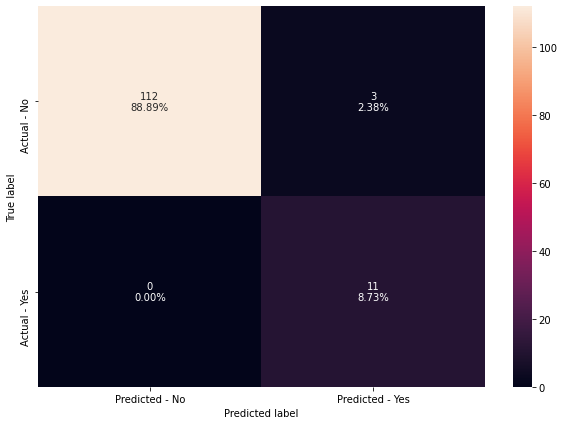

In [75]:
make_confusion_matrix(bagging_estimator,y_test)

In [86]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [90]:
print_model_performance_for_classification(model=rf_estimator, 
                                           features=X_train, 
                                           target=y_train)


Accuracy:1.0
Recall:1.0
Precision: 1.0
F1 score: 1.0


In [81]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_score=get_metrics_score(rf_estimator)

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0


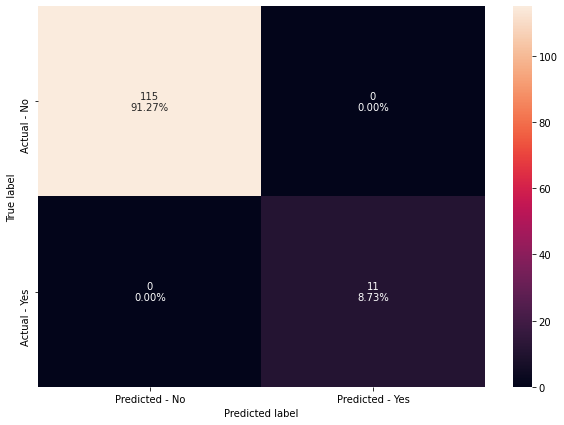

In [82]:
make_confusion_matrix(rf_estimator,y_test)

In [19]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=20,
                  random_state=1)

In [20]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_tuned_score=get_metrics_score(bagging_estimator_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9444444444444444
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  0.6428571428571429


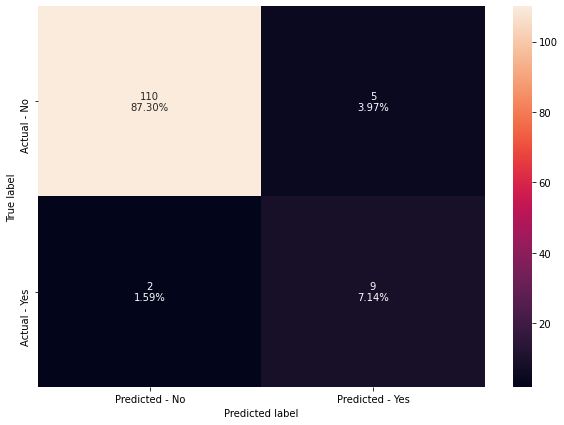

In [21]:
make_confusion_matrix(bagging_estimator_tuned,y_test)

In [91]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [93]:
print_model_performance_for_classification(model=bagging_lr, 
                                           features=X_train, 
                                           target=y_train)


Accuracy:0.9931506849315068
Recall:0.9166666666666666
Precision: 1.0
F1 score: 0.9565217391304348


In [79]:
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_lr_score=get_metrics_score(bagging_lr)

Accuracy on training set :  0.9931506849315068
Accuracy on test set :  0.9920634920634921
Recall on training set :  0.9166666666666666
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9166666666666666


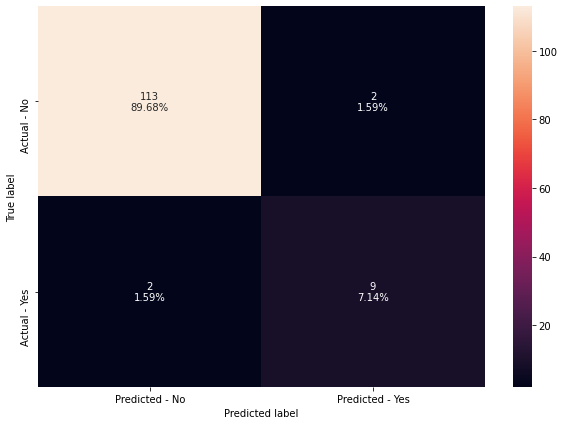

In [24]:
make_confusion_matrix(bagging_lr,y_test)

In [25]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_features=0.6000000000000001, max_samples=0.5,
                       min_samples_leaf=9, n_estimators=150, random_state=1)

In [26]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_tuned_score=get_metrics_score(rf_estimator_tuned)

Accuracy on training set :  0.9931506849315068
Accuracy on test set :  0.9444444444444444
Recall on training set :  0.9583333333333334
Recall on test set :  0.8181818181818182
Precision on training set :  0.9583333333333334
Precision on test set :  0.6428571428571429


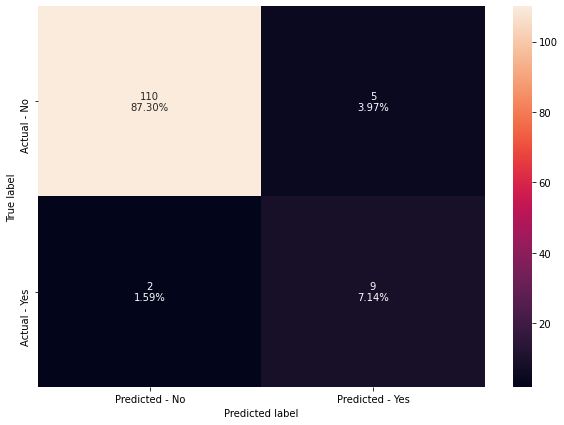

In [27]:
make_confusion_matrix(rf_estimator_tuned,y_test)

In [28]:
# Choose the type of classifier. 
rf_estimator_weighted = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "class_weight": [{0: 0.3, 1: 0.7}],
    "n_estimators": [100,150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_weighted, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_weighted = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_weighted.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7},
                       max_features=0.30000000000000004, max_samples=0.3,
                       min_samples_leaf=6, n_estimators=250, random_state=1)

In [29]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_estimator_weighted_score=get_metrics_score(rf_estimator_weighted)

Accuracy on training set :  0.9897260273972602
Accuracy on test set :  0.9365079365079365
Recall on training set :  0.9583333333333334
Recall on test set :  0.7272727272727273
Precision on training set :  0.92
Precision on test set :  0.6153846153846154


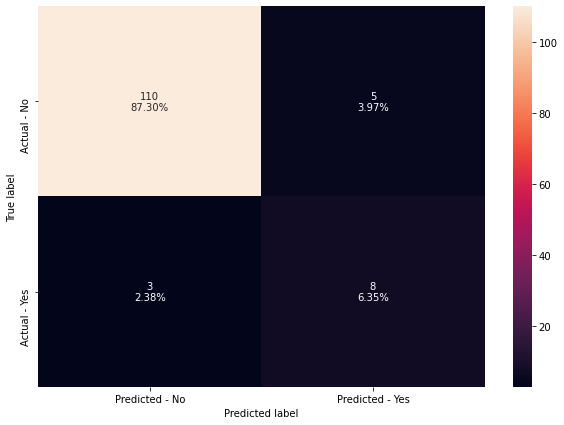

In [30]:
make_confusion_matrix(rf_estimator_weighted,y_test)

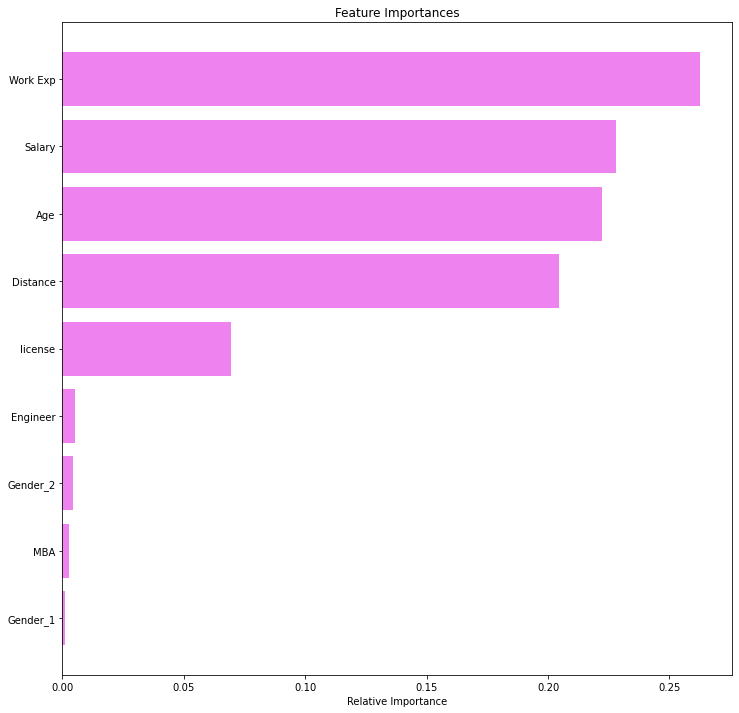

In [31]:
importances = rf_estimator_weighted.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [32]:
# defining list of models
models = [bagging_estimator,bagging_estimator_tuned,bagging_lr,rf_estimator,rf_estimator_tuned,
          rf_estimator_weighted]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [33]:
comparison_frame = pd.DataFrame({'Model':['Bagging classifier with default parameters','Tuned Bagging Classifier',
                                        'Bagging classifier with base_estimator=LR', 'Random Forest with deafult parameters',
                                         'Tuned Random Forest Classifier','Random Forest with class_weights'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Bagging classifier with default parameters,1.00,0.94,1.00,0.82,0.96,0.60
1,Tuned Bagging Classifier,1.00,0.94,1.00,0.82,1.00,0.64
2,Bagging classifier with base_estimator=LR,1.00,0.97,0.96,0.82,1.00,0.82
3,Random Forest with deafult parameters,1.00,0.94,1.00,0.82,1.00,0.64
4,Tuned Random Forest Classifier,0.99,0.94,0.96,0.82,0.96,0.64
5,Random Forest with class_weights,0.99,0.94,0.96,0.73,0.92,0.62


In [113]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [114]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0


In [115]:
print_model_performance_for_classification(model=abc, 
                                           features=X_train, 
                                           target=y_train)

Accuracy:1.0
Recall:1.0
Precision: 1.0
F1 score: 1.0


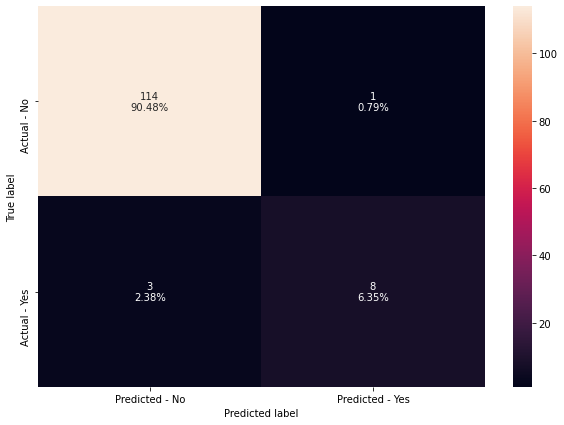

In [39]:
make_confusion_matrix(abc,y_test)

In [116]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [117]:
print_model_performance_for_classification(model=gbc, 
                                           features=X_train, 
                                           target=y_train)

Accuracy:1.0
Recall:1.0
Precision: 1.0
F1 score: 1.0


In [41]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  1.0
Accuracy on test set :  0.9603174603174603
Recall on training set :  1.0
Recall on test set :  0.9090909090909091
Precision on training set :  1.0
Precision on test set :  0.7142857142857143


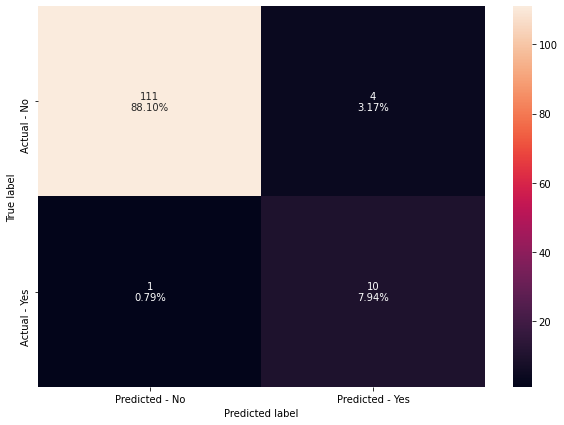

In [42]:
make_confusion_matrix(gbc,y_test)

In [118]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [119]:
print_model_performance_for_classification(model=xgb, 
                                           features=X_train, 
                                           target=y_train)

Accuracy:1.0
Recall:1.0
Precision: 1.0
F1 score: 1.0


In [44]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  1.0
Accuracy on test set :  0.9444444444444444
Recall on training set :  1.0
Recall on test set :  0.7272727272727273
Precision on training set :  1.0
Precision on test set :  0.6666666666666666


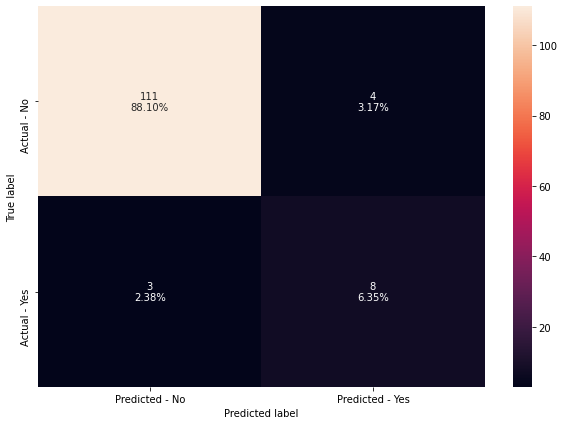

In [45]:
make_confusion_matrix(xgb,y_test)

In [112]:
from sklearn.tree import DecisionTreeClassifier

# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

KeyboardInterrupt: 

In [48]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9841269841269841
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  1.0


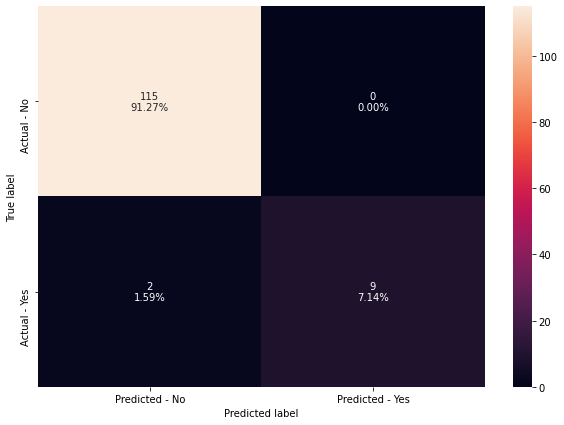

In [49]:
make_confusion_matrix(abc_tuned,y_test)

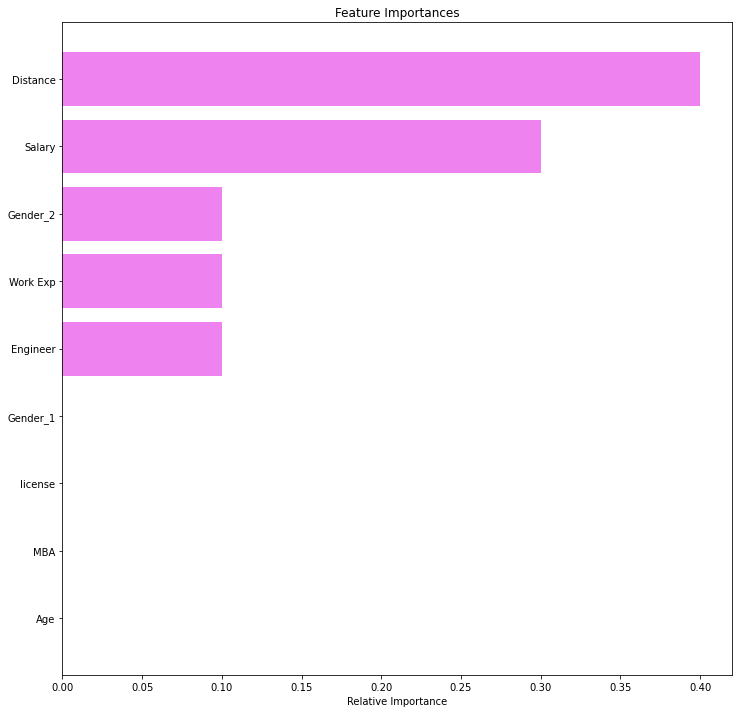

In [50]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [51]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [52]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  1.0
Accuracy on test set :  0.9444444444444444
Recall on training set :  1.0
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  0.6428571428571429


In [53]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.8)

In [54]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9523809523809523
Recall on training set :  1.0
Recall on test set :  0.7272727272727273
Precision on training set :  1.0
Precision on test set :  0.7272727272727273


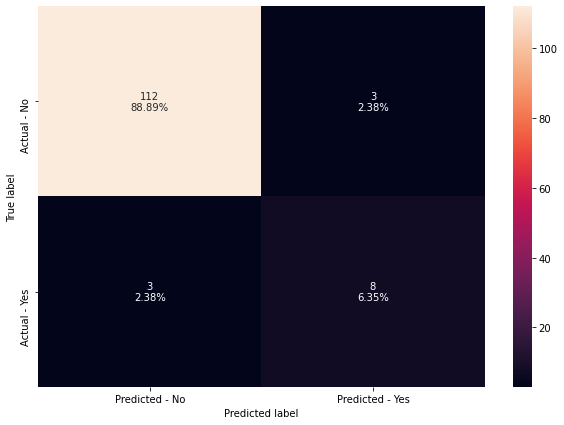

In [55]:
make_confusion_matrix(gbc_tuned,y_test)

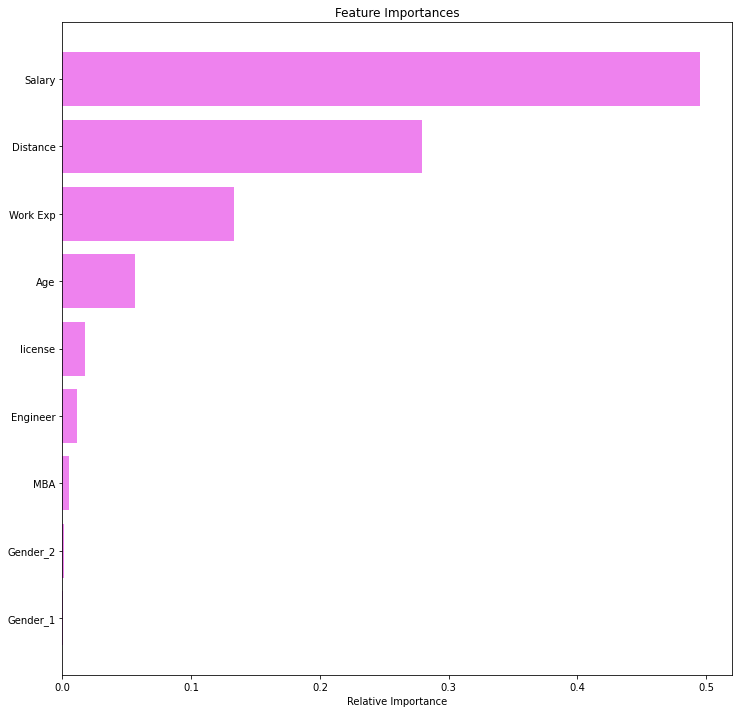

In [56]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [57]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=5,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [58]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.9897260273972602
Accuracy on test set :  0.9523809523809523
Recall on training set :  0.9583333333333334
Recall on test set :  0.9090909090909091
Precision on training set :  0.92
Precision on test set :  0.6666666666666666


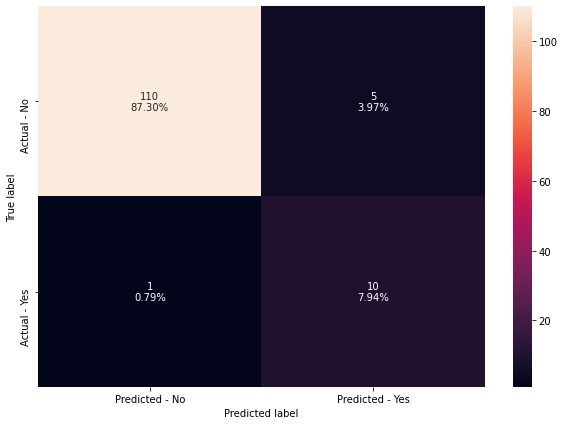

In [59]:
make_confusion_matrix(xgb_tuned,y_test)

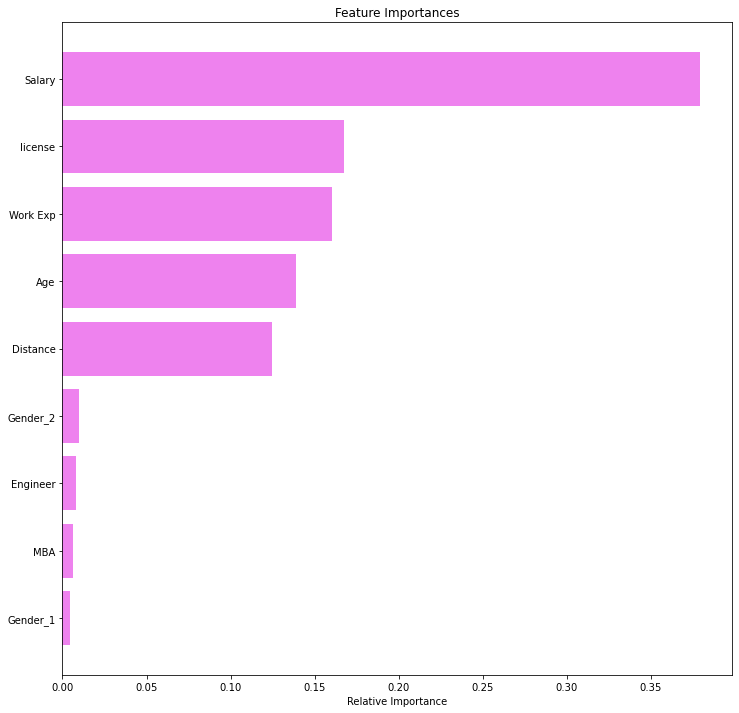

In [60]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [61]:
# defining list of models
models = [abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [62]:
comparison_frame = pd.DataFrame({'Model':['AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,AdaBoost with default paramters,1.00,0.97,1.00,0.73,1.00,0.89
1,AdaBoost Tuned,1.00,0.98,1.00,0.82,1.00,1.00
2,Gradient Boosting with default parameters,1.00,0.96,1.00,0.91,1.00,0.71
3,Gradient Boosting with init=AdaBoost,1.00,0.94,1.00,0.82,1.00,0.64
4,Gradient Boosting Tuned,1.00,0.95,1.00,0.73,1.00,0.73
5,XGBoost with default parameters,1.00,0.94,1.00,0.73,1.00,0.67
6,XGBoost Tuned,0.99,0.95,0.96,0.91,0.92,0.67


<AxesSubplot:>

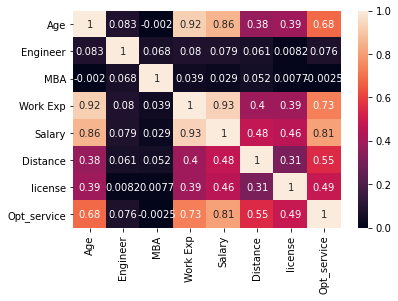

In [65]:
sns.heatmap(car_report.corr(), annot=True)  # plot the correlation coefficients 

In [70]:
print_training_testing_meta(X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

Shape of Training set : (292, 9)
Shape of test set : (126, 9)
Percentage of classes in training set:0    0.917808
1    0.082192
Name: Opt_service, dtype: float64
Percentage of classes in test set:0    0.912698
1    0.087302
Name: Opt_service, dtype: float64


In [ ]:
# bagging classifier
Accuracy on training set :  0.9931506849315068
Accuracy on test set :  0.9920634920634921
Recall on training set :  0.9166666666666666
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
    

# random forest
Accuracy on training set :  1.0
Accuracy on test set :  1.0
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  1.0

In [110]:
bagging_lr=BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion = 'gini',random_state=1,max_depth=5),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        random_state=1),
                  random_state=1)

In [111]:
print_model_performance_for_classification(model=bagging_lr, 
                                           features=X_train, 
                                           target=y_train)

Accuracy:1.0
Recall:1.0
Precision: 1.0
F1 score: 1.0


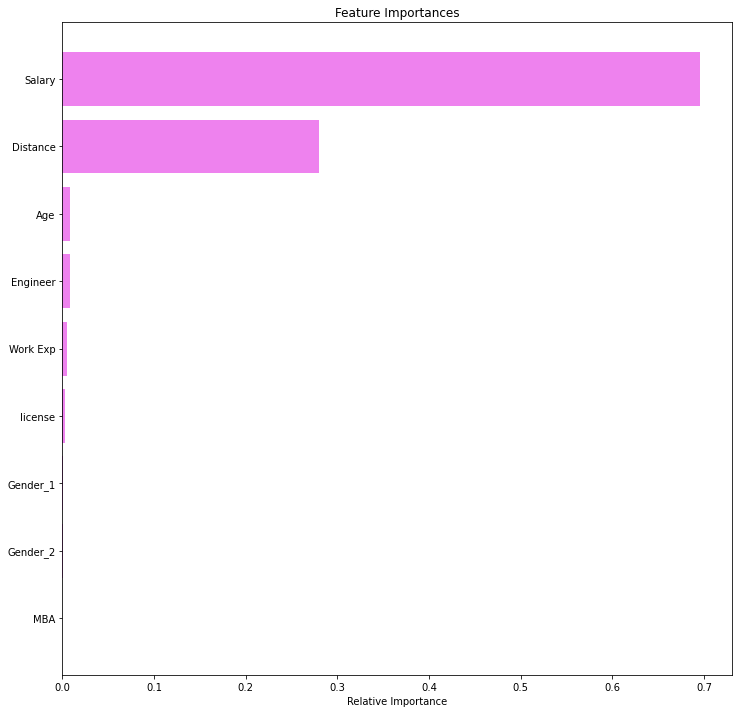

In [120]:
importances = gbc.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [132]:
gbc = GradientBoostingClassifier(random_state=1,n_estimators=400,learning_rate=0.01)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=400, random_state=1)

In [133]:
print_model_performance_for_classification(model=gbc, 
                                           features=X_train, 
                                           target=y_train)

Accuracy:1.0
Recall:1.0
Precision: 1.0
F1 score: 1.0


In [134]:
from sklearn.ensemble import StackingClassifier

In [158]:
estimators = [
    ("rf", AdaBoostClassifier(random_state=1)),
    ("svr", GradientBoostingClassifier(random_state=1)),
]

sc = StackingClassifier(estimators=estimators,
                   final_estimator=XGBClassifier(random_state=1))

In [159]:
sc.fit(X_train, y_train)

[23:51:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(estimators=[('rf', AdaBoostClassifier(random_state=1)),
                               ('svr',
                                GradientBoostingClassifier(random_state=1))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 enable_categorical=False,
                                                 gamma=None, gpu_id=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
        

In [161]:
print_model_performance_for_classification(model=sc, 
                                           features=X_test, 
                                           target=y_test)

Accuracy:0.9761904761904762
Recall:1.0
Precision: 0.7857142857142857
F1 score: 0.88
